<a href="https://colab.research.google.com/github/fuadiub/SPT-Depth/blob/main/spt_depth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

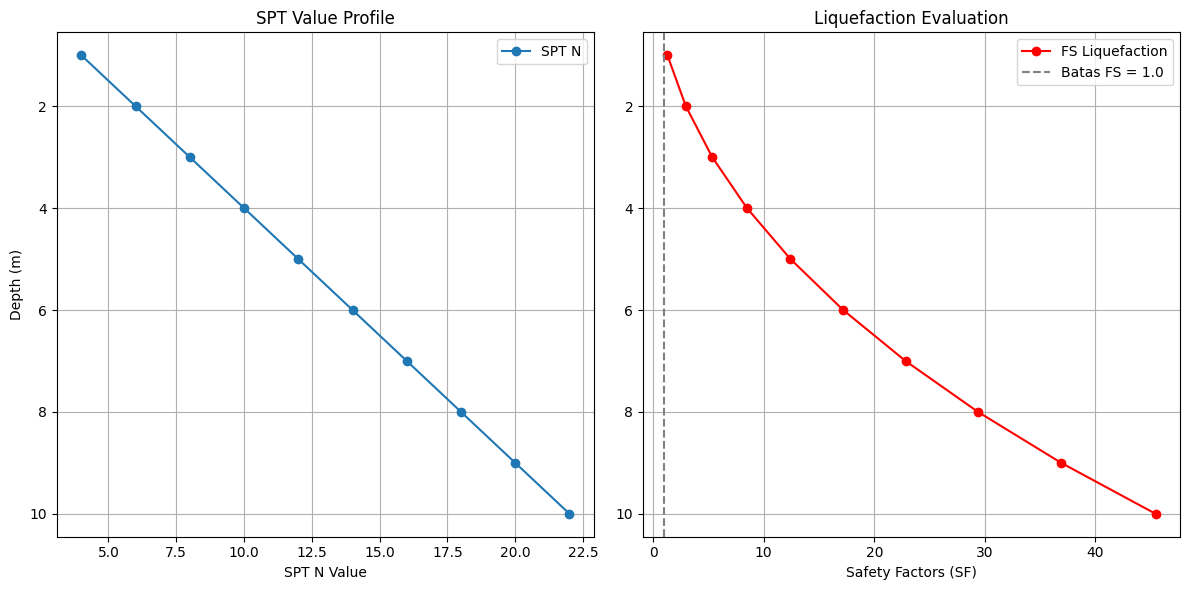

[(np.int64(1), np.int64(4), np.float64(1.3)),
 (np.int64(2), np.int64(6), np.float64(2.96)),
 (np.int64(3), np.int64(8), np.float64(5.35)),
 (np.int64(4), np.int64(10), np.float64(8.49)),
 (np.int64(5), np.int64(12), np.float64(12.42)),
 (np.int64(6), np.int64(14), np.float64(17.19)),
 (np.int64(7), np.int64(16), np.float64(22.82)),
 (np.int64(8), np.int64(18), np.float64(29.38)),
 (np.int64(9), np.int64(20), np.float64(36.9)),
 (np.int64(10), np.int64(22), np.float64(45.43))]

In [3]:
# Drilling data SPT (depth and N value) [test data only]
depth = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # depth (m)
N_value = np.array([4, 6, 8, 10, 12, 14, 16, 18, 20, 22])  # SPT value

# Earthquake and soil parameter
amax = 0.2        # maximum acceleration of an earthquake (g)
g = 9.81          # acceleration of gravity (m/s²)
sigma_v = depth * 17  # total vertikal stress (kN/m²), assume gamma = 17
u = depth * 9.81       # pore water pressure (assuming full saturation)
sigma_v_eff = sigma_v - u  # effective vertikal stress

# CSR (Cyclic Stress Ratio) according to Seed & Idriss (1971)
rd = 1 - 0.015 * depth  # reduction factor
rd[rd < 0.7] = 0.7
CSR = 0.65 * (amax / g) * (sigma_v / sigma_v_eff) * rd

# CRR (Cyclic Resistance Ratio) estimation of SPT, using simple correlation
N_1_60 = N_value * 1.0  # assume correction 1.0 (for simplicity)
CRR = (N_1_60 / 20.0) ** 2  # simple empirical approach

# Safety Factors against Liquefaction
FS_liq = CRR / CSR

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot SPT value
ax[0].plot(N_value, depth, marker='o', label='SPT N')
ax[0].invert_yaxis()
ax[0].set_xlabel("SPT N Value")
ax[0].set_ylabel("Depth (m)")
ax[0].set_title("SPT Value Profile")
ax[0].grid(True)
ax[0].legend()

# Plot FS Liquefaction
ax[1].plot(FS_liq, depth, marker='o', color='red', label='FS Liquefaction')
ax[1].axvline(1.0, color='gray', linestyle='--', label='Batas FS = 1.0')
ax[1].invert_yaxis()
ax[1].set_xlabel("Safety Factors (SF)")
ax[1].set_title("Liquefaction Evaluation")
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

# Result
list(zip(depth, N_value, FS_liq.round(2)))

| Depth (m) | SPT (N) Value | SF Liquefaction |
| ------------- | ------------- | ------------- |
| 1             | 4             | 1.3           |
| 2             | 6             | 2.96          |
| 3             | 8             | 5.35          |
| 4             | 10            | 8.49          |
| 5             | 12            | 12.42         |
| 6             | 14            | 17.19         |
| 7             | 16            | 22.82         |
| 8             | 18            | 29.38         |
| 9             | 20            | 36.90         |
| 10            | 22            | 45.43         |


Visual Interpretation Left graph: SPT value profile against depth

Right graph: Liquefaction FS against depth

The gray vertical line shows the stability limit (FS = 1.0)

Conclusion: Shallow soil at a depth of 1 meter has FS = 1.3 → approaching the liquefaction limit.

Deeper layers are much safer (FS >> 1.0).

Special attention is needed on shallow layers especially if the groundwater level is high.